<a href="https://colab.research.google.com/github/A-Marambe/Raster_tools/blob/master/Heavy_arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This code conver image to numpy array, and create new arrays based on conditional value placement of other rasters.**

In [0]:
# import modules
import os
import numpy as np
import pandas as pd

from osgeo import gdal,osr
from matplotlib import pyplot as plt
import rasterio as ras
from rasterio.plot import show

%matplotlib inline

In [4]:
#soil image
soil_data = ras.open("soil.tif")
soil = soil_data.read(1)
soil

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

***Here 127  is no data value***


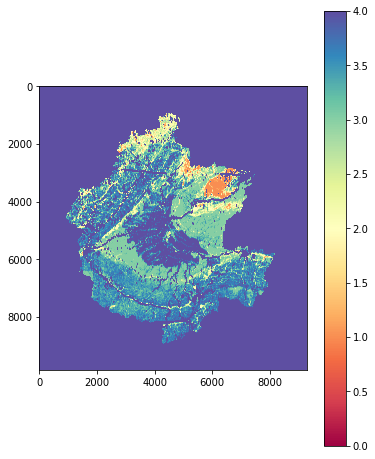

In [5]:
#image soil
fig, ax = plt.subplots(figsize=(6,8))
plt.imshow(soil, cmap="Spectral", vmin=0, vmax=4)
plt.colorbar(orientation='vertical')

In [6]:
# LC
lc_data = ras.open("LC2.tif")
lc = lc_data.read(1)
lc

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [0]:
# from google.colab import drive
#drive.mount('/content/drive')

soil dimentions are (9845, 9292)


Land cover  dimentions are (9845, 9292)


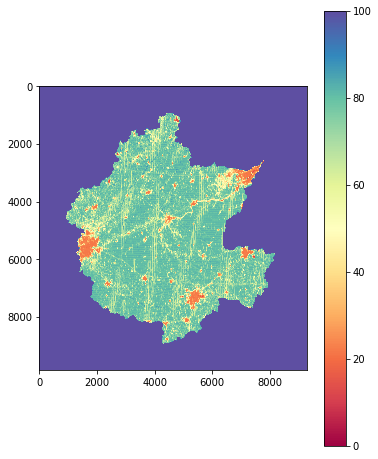

In [8]:
fig, ax = plt.subplots(figsize=(6,8))
plt.imshow(lc, cmap="Spectral", vmin=0, vmax=100)
plt.colorbar(orientation='vertical')


# dimentions
print("soil dimentions are {}".format(np.shape(soil)))
print("\n")
print("Land cover  dimentions are {}".format(np.shape(lc)))

**Create empty array to fill data based on conditionals**

---



---



In [17]:
cc = np.zeros(shape=(9845, 9292))
xx = cc.astype(int)
xx

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
a = np.where((lc==24) & (soil==3), xx+12, xx)
b = np.where((lc==23) & (soil==3), a+12, a)
c= np.where((lc==22) & (soil==3), b+12, b)
d = np.where((lc==21) & (soil==3), c+12, c)
e = np.where((lc==43) & (soil==4), d+10, d)

In [20]:
e


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

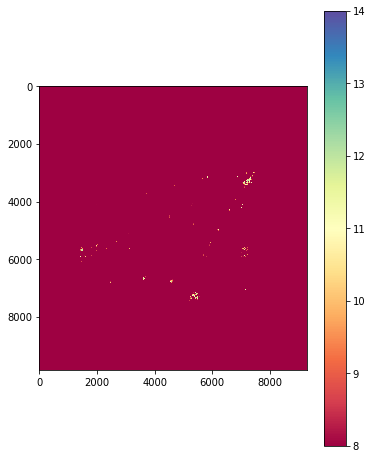

In [21]:
fig, ax = plt.subplots(figsize=(6,8))
plt.imshow(e, cmap="Spectral", vmin=8, vmax=14)
plt.colorbar(orientation='vertical')

In [22]:
lc_meta = lc_data.profile
lc_meta

{'driver': 'ENVI', 'dtype': 'uint8', 'nodata': 255.0, 'width': 9292, 'height': 9845, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(29.99800557, -0.0, -9526144.1683,
       -0.0, -29.99800558, 5192641.7369), 'tiled': False, 'interleave': 'band'}

In [23]:
lc_transform = lc_meta["transform"]
lc_crs = lc_meta["crs"]
lc_transform, lc_crs

(Affine(29.99800557, -0.0, -9526144.1683,
       -0.0, -29.99800558, 5192641.7369),
 CRS.from_epsg(3857))

In [25]:
image_e = np.uint8(e)
image_e

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
# write your the ndvi raster object
with ras.open('curve_no.tif', 'w', **lc_meta ) as dst:
    dst.write(image_e, 1)